channel_questions = {
    survey_questions = {
    # Help Session Attendance and Preferences
    'Q3': 'How often did you attend an in-person or virtual help session?',
    'Q15': 'Select ALL inconveniences of office hours that have stopped you attending office hours in the past for other courses.',
    'Q16': 'What has been your preferred method of seeking help previously?',
    'Q17': 'What is your preference now after using the HelpMe system in this course?',
    
    # HelpMe System General Feedback (5-point Likert)
    'Q13_1': 'I found the HelpMe system was an effective single location to go to for the help I needed.',
    'Q13_2': 'I prefer my help experience with the HelpMe system compared to office hours/help sessions in other courses.',
    'Q13_3': 'I attended help sessions more frequently in this course compared to other courses.',
    'Q13_4': 'Help sessions helped my performance in the course.',
    'Q13_5': 'Overall, help sessions are useful for me.',
    
    # System Usability Scale (SUS) Questions
    'Q11_1': 'I think I would like to use this tool frequently.',
    'Q11_2': 'I found the tool unnecessarily complex.',
    'Q11_3': 'I thought the tool was easy to use.',
    'Q11_4': 'I think that I would need the support of a technical person to be able to use this system.',
    'Q11_5': 'I found the various functions in this tool were well integrated.',
    'Q11_6': 'I thought there was too much inconsistency in this tool.',
    'Q11_7': 'I would imagine that most people would learn to use this tool very quickly.',
    'Q11_8': 'I found the tool very cumbersome to use.',
    'Q11_9': 'I felt very confident using the tool.',
    'Q11_10': 'I needed to learn a lot of things before I could get going with this tool.',
    
    # Open-ended Software Feedback
    'Q4': 'What aspects of the software did you find helpful?',
    'Q19': 'What additional features would you like to see with this software?',
    'Q20': 'Please provide any general comments about the software and its use in the course.',
    
    # Chatbot-specific Questions
    'Q22': 'How often did you use the chatbot?',
    'Q21_1': 'I am willing to use a chatbot or any available AI system for help in a course.',
    'Q21_2': 'Chatbot answers were relevant and accurate.',
    'Q21_3': 'Chatbot conversation was human-like.',
    'Q21_4': 'The chatbot including source material links was helpful.',
    'Q21_5': 'The chatbot assisted me in meeting my learning outcomes.',
    'Q21_6': 'Chatbots should be used in other courses.',
    'Q21_7': 'I would prefer to use a course-provided chatbot rather than a private option like ChatGPT.',
    'Q21_8': 'I would rather use the chatbot than use office hours or email to communicate with teaching staff.',
    'Q21_9': 'I would recommend a struggling peer to use the chatbot for assistance.',
    'Q11': 'Please provide any general comments about the chatbot and its use in the course.',
    
    # Anytime Questions Feature
    'Q23': 'How often did you use the Anytime Question feature?',
    'Q24_1': 'I prefer email over asking Anytime Questions via HelpMe.',
    'Q24_2': 'Public Anytime Question answers were helpful.',
    'Q24_3': 'A single place for help (office hours, chatbot, Anytime Questions) is beneficial.',
    'Q25': 'How would you rate the quality and relevance of the answers provided by the AI in Anytime Questions?',
    'Q27': 'I asked more questions to the chatbot or Anytime Questions than I sent emails in the course.',
    'Q26': 'Please provide any general comments regarding how the Anytime Question support compares to email, the AI chatbot, or traditional, in-person office hours.',
}
}

In [ ]:
#sus


/Users/kevin/projects/chatbot_analysis/venv/lib/python3.12/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


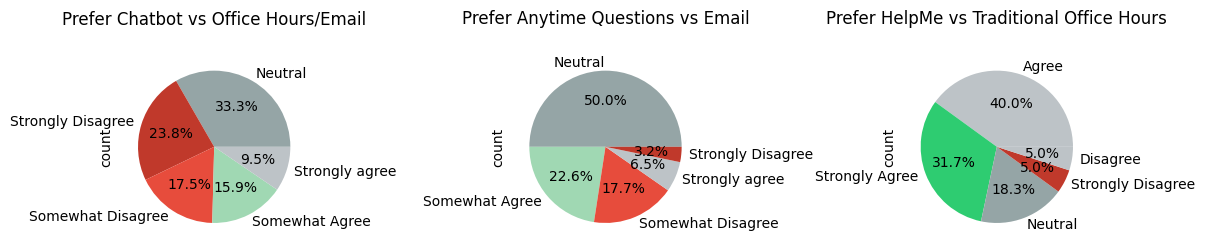

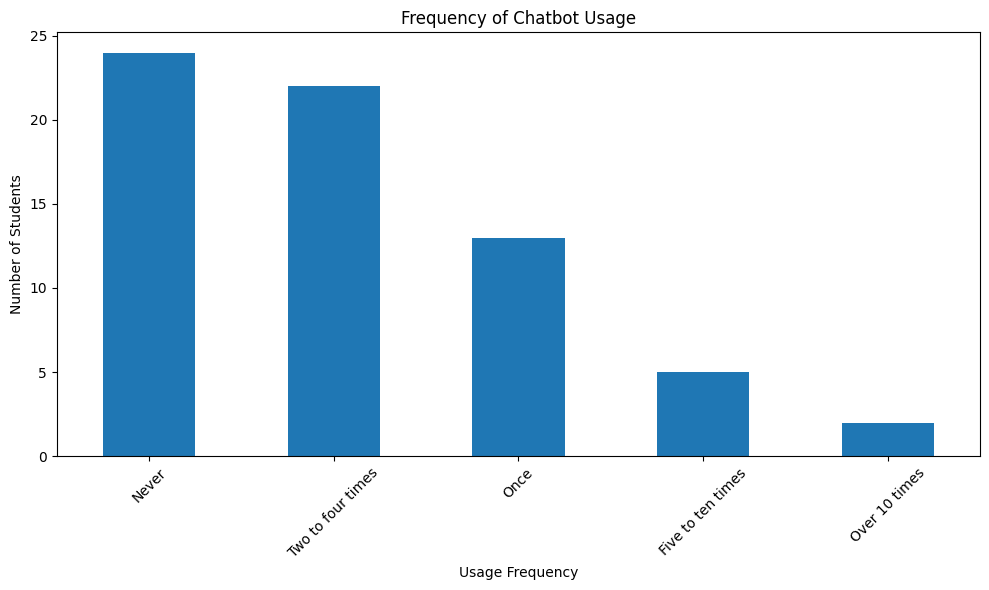

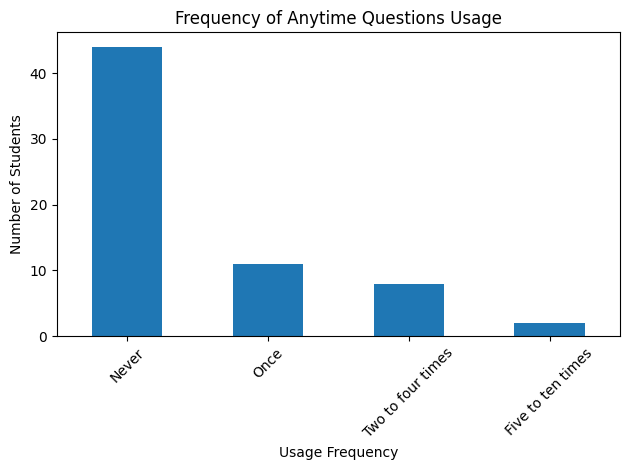


Average response time: 335.85 seconds


In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("./survey.xlsx")


# Remove the header row and keep only completed surveys
df_clean = df.iloc[1:].copy()
df_clean = df_clean[df_clean['Finished'] == 'True']

# Channel preference questions
channel_questions = {
    'Q21_8': 'Prefer Chatbot vs Office Hours/Email',
    'Q24_1': 'Prefer Anytime Questions vs Email',
    'Q13_2': 'Prefer HelpMe vs Traditional Office Hours'
}

plt.figure(figsize=(12, 6))

for idx, (col, title) in enumerate(channel_questions.items(), 1):
    responses = df_clean[col].value_counts()

    plt.subplot(1, 3, idx)

    colors = {
        'Strongly Agree': '#2ecc71',
        'Somewhat Agree': '#a0d8b3',
        'Neutral': '#95a5a6',
        'Somewhat Disagree': '#e74c3c',
        'Strongly Disagree': '#c0392b'
    }

    responses.plot(kind='pie', autopct='%1.1f%%', colors=[
                   colors.get(x, '#bdc3c7') for x in responses.index])
    plt.title(title, pad=20)

plt.tight_layout()
plt.show()

# usage frequency
usage_questions = {
    'Q22': 'Chatbot Usage',
    'Q23': 'Anytime Questions Usage'
}

plt.figure(figsize=(10, 6))
for col, title in usage_questions.items():
    usage = df_clean[col].value_counts()
    usage.plot(kind='bar')
    plt.title(f'Frequency of {title}')
    plt.xlabel('Usage Frequency')
    plt.ylabel('Number of Students')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Calculate and display average response times
if 'Duration (in seconds)' in df_clean.columns:
    df_clean['Duration (in seconds)'] = pd.to_numeric(
        df_clean['Duration (in seconds)'], errors='coerce')
    avg_duration = df_clean['Duration (in seconds)'].mean()
    print(f"\nAverage response time: {avg_duration:.2f} seconds")


Number of valid responses: 61
Average SUS Score: 58.85


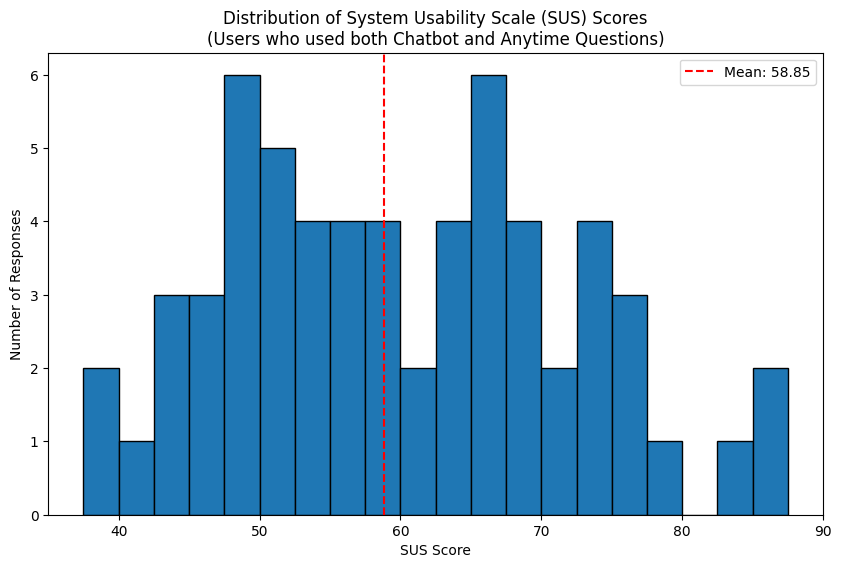

In [11]:

comparison_questions = {
    'Q16': 'Previous Help Preference',
    'Q17': 'Current Help Preference',
    'Q13_1': 'HelpMe System Effectiveness'
}

comparison_df = df_clean[comparison_questions.keys()]
comparison_df.columns = comparison_questions.values()

comparison_df['SUS Score'] = df_clean['sus_score']

comparison_df = comparison_df.sort_values('SUS Score', ascending=False)

print("\nComparison Table:")
print(comparison_df.to_string(index=False))

print("\nSummary Statistics:")
print(f"Average SUS Score: {comparison_df['SUS Score'].mean():.2f}")
print("\nHelpMe System Effectiveness Distribution:")
print(comparison_df['HelpMe System Effectiveness'].value_counts())
print("\nPreference Change Analysis:")
print("Number of users who changed their preference:", 
      sum(comparison_df['Previous Help Preference'] != comparison_df['Current Help Preference']))

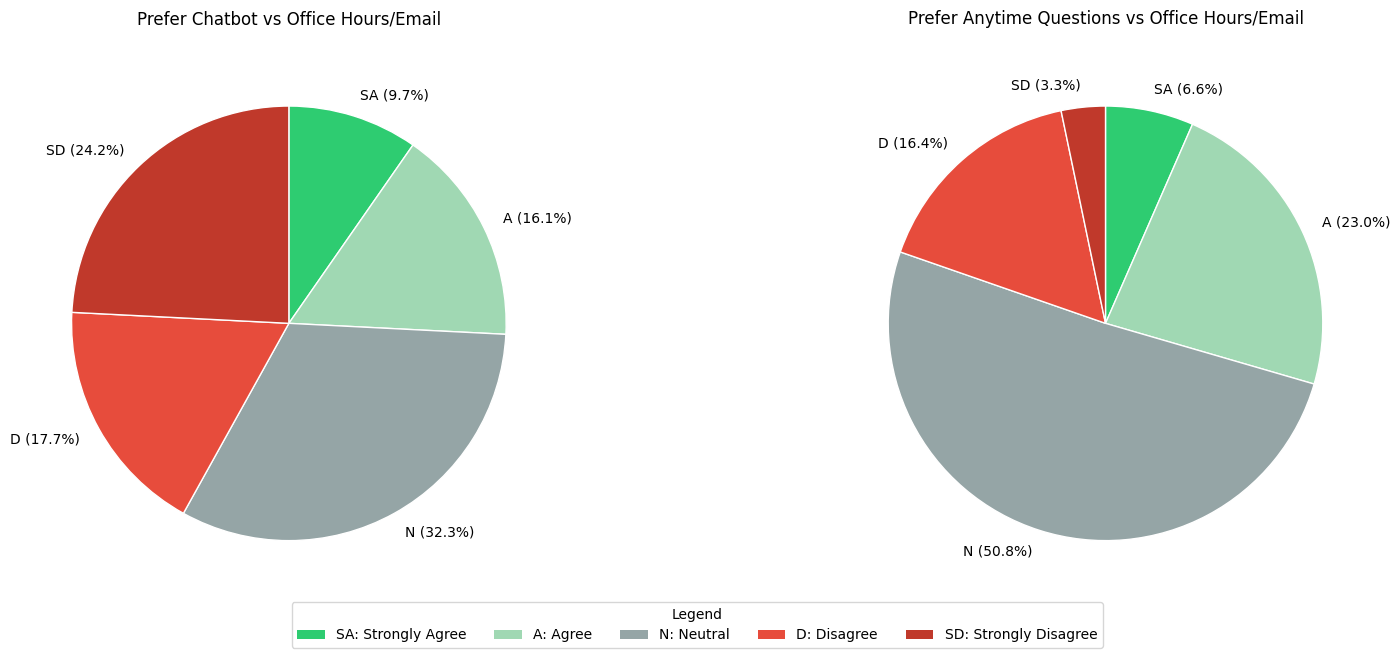

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_excel("./survey.xlsx")

df_clean = df.iloc[1:].copy()
df_clean = df_clean[df_clean['Finished'] == 'True']

# Channel preference questions
channel_questions = {
    'Q21_8': 'Prefer Chatbot vs Office Hours/Email',
    'Q24_1': 'Prefer Anytime Questions vs Office Hours/Email',
    # 'Q13_2': 'Prefer HelpMe vs Traditional Office Hours'
}

# Define short labels for the categories
short_labels = {
    'Strongly Agree': 'SA',
    'Somewhat Agree': 'A',
    'Agree': 'A',
    'Neutral': 'N',
    'Somewhat Disagree': 'D',
    'Disagree': 'D',
    'Strongly Disagree': 'SD',
    'Strongly agree': 'SA',
    'Somewhat agree': 'A',
    'Disagree': 'D',
    'Somewhat disagree': 'D',
    'Strongly disagree': 'SD'
}

# Define colors for the short labels
color_mapping = {
    'SA': '#2ecc71',  # Strong green
    'A': '#a0d8b3',   # Light green
    'N': '#95a5a6',   # Grey
    'D': '#e74c3c',   # Light red
    'SD': '#c0392b'   # Strong red
}

# Create a figure for channel preferences
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Process and plot each channel preference question
for idx, (col, title) in enumerate(channel_questions.items()):
    # Map responses to short labels
    df_clean['Short_Label'] = df_clean[col].map(short_labels)
    
    df_clean['Short_Label'] = df_clean['Short_Label'].fillna('Unknown')
    
    # Aggregate responses by short labels
    responses = df_clean['Short_Label'].value_counts().reindex(['SA', 'A', 'N', 'D', 'SD'], fill_value=0)

    responses.plot(
        kind='pie',
        ax=axes[idx],
        labels=[f"{label} ({count / responses.sum() * 100:.1f}%)" 
                for label, count in responses.items() if count > 0],
        colors=[color_mapping.get(label, '#bdc3c7') for label in responses.index if responses[label] > 0],
        autopct='',
        startangle=90,
        counterclock=False,
        wedgeprops={'edgecolor': 'white'}
    )
    axes[idx].set_title(title, pad=20)
    axes[idx].set_ylabel('')  # Remove the count label


from matplotlib.patches import Patch

legend_elements = [
    Patch(facecolor=color_mapping['SA'], label='SA: Strongly Agree'),
    Patch(facecolor=color_mapping['A'], label='A: Agree'),
    Patch(facecolor=color_mapping['N'], label='N: Neutral'),
    Patch(facecolor=color_mapping['D'], label='D: Disagree'),
    Patch(facecolor=color_mapping['SD'], label='SD: Strongly Disagree')
]

fig.legend(
    handles=legend_elements, 
    title="Legend",
    loc="lower center",
    ncol=5,
    bbox_to_anchor=(0.5, -0.1)
)

plt.tight_layout()
plt.subplots_adjust(bottom=0)  
plt.show()